# Importing Libraries

In [2]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Feeding input dataset

In [3]:
data = pd.read_csv("./dataset/TNCities.csv",header=0)
data.head()

date  aqi      co    no    no2     o3    so2  pm2_5   pm10   nh3  \
0  1640995200    4  440.60  0.00   9.60  77.25  11.21  44.11  55.34  1.65   
1  1640998800    4  453.95  0.00  10.20  79.39  11.44  45.22  57.18  1.74   
2  1641002400    4  560.76  0.02  14.91  77.25  13.23  46.26  59.88  2.60   
3  1641006000    4  634.19  0.32  19.54  76.53  15.26  47.94  63.51  2.72   
4  1641009600    5  547.41  0.54  13.71  92.98  18.12  53.48  70.75  0.65   

      city  
0  Chennai  
1  Chennai  
2  Chennai  
3  Chennai  
4  Chennai

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113770 entries, 0 to 113769
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    113770 non-null  int64  
 1   aqi     113770 non-null  int64  
 2   co      113770 non-null  float64
 3   no      113770 non-null  float64
 4   no2     113770 non-null  float64
 5   o3      113770 non-null  float64
 6   so2     113770 non-null  float64
 7   pm2_5   113770 non-null  float64
 8   pm10    113770 non-null  float64
 9   nh3     113770 non-null  float64
 10  city    113770 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 9.5+ MB


# Exploratory Data Analysis

In [5]:
df1 = data.copy()
df1['co']=df1['co'].fillna((df1['co'].median()))
df1['no']=df1['no'].fillna((df1['no'].median()))
df1['no2']=df1['no2'].fillna((df1['no2'].median()))
df1['o3']=df1['o3'].fillna((df1['o3'].median()))
df1['so2']=df1['so2'].fillna((df1['so2'].median()))
df1['pm2_5']=df1['pm2_5'].fillna((df1['pm2_5'].median()))
df1['pm10']=df1['pm10'].fillna((df1['pm10'].median()))
df1['nh3']=df1['nh3'].fillna((df1['nh3'].median()))

In [6]:
df1.head()

date  aqi      co    no    no2     o3    so2  pm2_5   pm10   nh3  \
0  1640995200    4  440.60  0.00   9.60  77.25  11.21  44.11  55.34  1.65   
1  1640998800    4  453.95  0.00  10.20  79.39  11.44  45.22  57.18  1.74   
2  1641002400    4  560.76  0.02  14.91  77.25  13.23  46.26  59.88  2.60   
3  1641006000    4  634.19  0.32  19.54  76.53  15.26  47.94  63.51  2.72   
4  1641009600    5  547.41  0.54  13.71  92.98  18.12  53.48  70.75  0.65   

      city  
0  Chennai  
1  Chennai  
2  Chennai  
3  Chennai  
4  Chennai

# Data Visulization

In [7]:
vis = df1.copy()
vis["Overall Pollution Content"] = vis["co"] + vis["no"] + vis["no2"] + vis["o3"] + vis["so2"] + vis["pm2_5"] + vis["pm10"] + vis["nh3"]
vis = vis.drop(["co","no","no2","o3","so2","pm2_5","pm10","nh3"],axis=1)

vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113770 entries, 0 to 113769
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       113770 non-null  int64  
 1   aqi                        113770 non-null  int64  
 2   city                       113770 non-null  object 
 3   Overall Pollution Content  113770 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ MB


In [41]:
def ploting(var):
    vis[var].iplot(title=var,xTitle='Chennai City',yTitle=var, linecolor='black', )
    plt.show()
ploting('Overall Pollution Content')

In [42]:
df1.head()

date  aqi      co    no    no2     o3    so2  pm2_5   pm10   nh3  \
0  1640995200    4  440.60  0.00   9.60  77.25  11.21  44.11  55.34  1.65   
1  1640998800    4  453.95  0.00  10.20  79.39  11.44  45.22  57.18  1.74   
2  1641002400    4  560.76  0.02  14.91  77.25  13.23  46.26  59.88  2.60   
3  1641006000    4  634.19  0.32  19.54  76.53  15.26  47.94  63.51  2.72   
4  1641009600    5  547.41  0.54  13.71  92.98  18.12  53.48  70.75  0.65   

      city  
0  Chennai  
1  Chennai  
2  Chennai  
3  Chennai  
4  Chennai

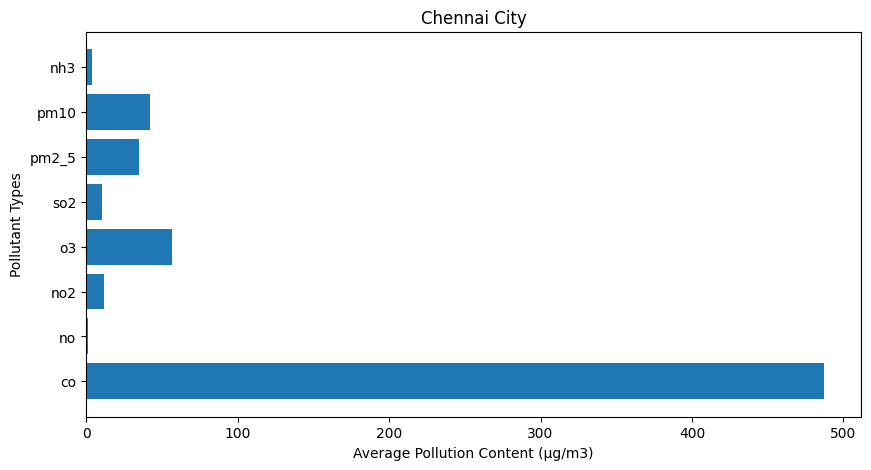

In [43]:
x_values = [df1['co'].mean(),df1['no'].mean(),df1['no2'].mean(),df1['o3'].mean(),df1['so2'].mean(),df1['pm2_5'].mean(),df1['pm10'].mean(),df1['nh3'].mean()]
y_values = ['co','no','no2','o3','so2','pm2_5','pm10','nh3']
plt.figure(figsize=(10,5))
plt.barh(y_values,x_values)
plt.title('Chennai City')
plt.xlabel('Average Pollution Content (µg/m3)')
plt.ylabel('Pollutant Types')
plt.show()

# Preprocessing

In [8]:
encoder = LabelEncoder()
df1["city_encoded"] = encoder.fit_transform(df1["city"])
df1.head()

date  aqi      co    no    no2     o3    so2  pm2_5   pm10   nh3  \
0  1640995200    4  440.60  0.00   9.60  77.25  11.21  44.11  55.34  1.65   
1  1640998800    4  453.95  0.00  10.20  79.39  11.44  45.22  57.18  1.74   
2  1641002400    4  560.76  0.02  14.91  77.25  13.23  46.26  59.88  2.60   
3  1641006000    4  634.19  0.32  19.54  76.53  15.26  47.94  63.51  2.72   
4  1641009600    5  547.41  0.54  13.71  92.98  18.12  53.48  70.75  0.65   

      city  city_encoded  
0  Chennai             0  
1  Chennai             0  
2  Chennai             0  
3  Chennai             0  
4  Chennai             0

In [9]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['aqi']=le.fit_transform(df1['aqi'].astype(str))
df1.info()

categorical_attributes ['city']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113770 entries, 0 to 113769
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          113770 non-null  int64  
 1   aqi           113770 non-null  int32  
 2   co            113770 non-null  float64
 3   no            113770 non-null  float64
 4   no2           113770 non-null  float64
 5   o3            113770 non-null  float64
 6   so2           113770 non-null  float64
 7   pm2_5         113770 non-null  float64
 8   pm10          113770 non-null  float64
 9   nh3           113770 non-null  float64
 10  city          113770 non-null  object 
 11  city_encoded  113770 non-null  int32  
dtypes: float64(8), int32(2), int64(1), object(1)
memory usage: 9.5+ MB


In [10]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

C:\Users\tharu\AppData\Local\Temp\ipykernel_16404\3030549476.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [28]:
y = df1["aqi"]
x = df1[['co','no','no2','o3','so2','pm2_5','pm10','nh3','city_encoded']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [29]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({0: 18867, 3: 17807, 1: 15762, 4: 15105, 2: 12098})


In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({0: 18867, 1: 18867, 4: 18867, 3: 18867, 2: 18867})


# Classification

### Support Vector Machine (SVM)

In [78]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)

cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

### Random Forest Classifier (RFC)

In [33]:
rf = RandomForestClassifier(n_estimators=20, random_state=25)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[8176   24    0    0    0]
 [  81 6085  498    0    0]
 [   0  158 3766 1177    0]
 [   0    0 1223 5846  689]
 [   0    0    0  376 6032]]


accuracy 87.61829421933139


### XGB Classifier (XGBC)

In [18]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[8157   43    0    0    0]
 [ 107 5934  623    0    0]
 [   0  169 2546 2386    0]
 [   0    1  499 6332  926]
 [   0    0    0  467 5941]]


accuracy 84.70305587296006


In [59]:
user_input = np.array([1000000,	1000000,	1000000,1000000,	1000000,	1000000,	1000000	,1000000])
user_input = user_input.reshape(1,-1)
prediction = gbc.predict(user_input)
print(prediction)  # Possible values: 0,1,2,3,4

[4]
